Yumna Mehdi


Machine Learning Final


Wine Quality Prediction



---



# Import Libaries

In [154]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, f1_score, precision_score, recall_score
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import keras
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from IPython.display import clear_output
from keras import optimizers
from sklearn import metrics
from keras.models import load_model
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
%matplotlib inline

# Data Analysis

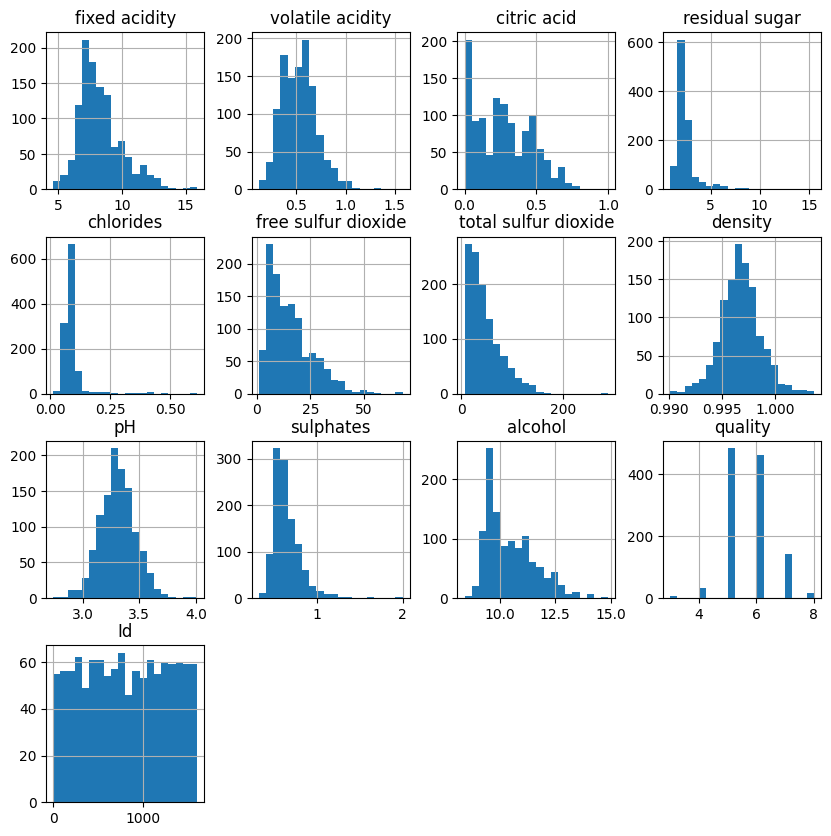

In [155]:
df = pd.read_csv('WineQT.csv')
df.head()

df.hist(bins=20, figsize=(10, 10))
plt.show()

<Axes: >

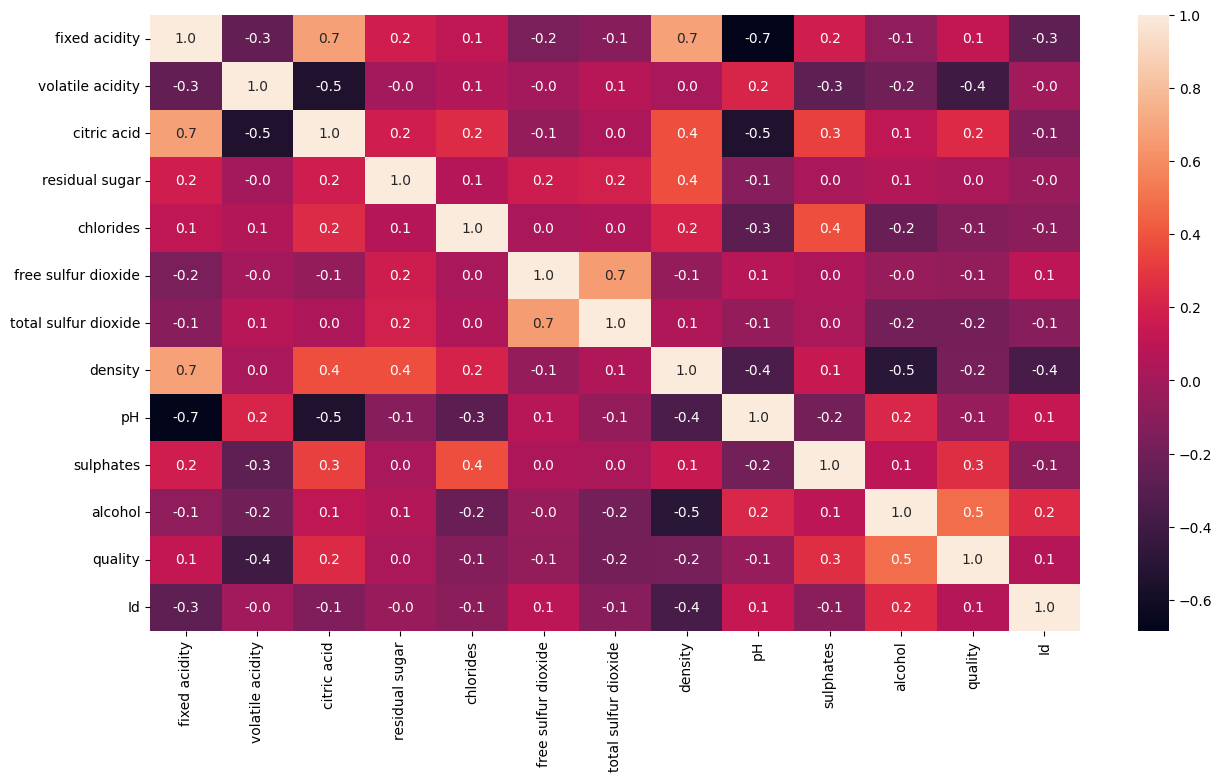

In [156]:
plt.figure(figsize = (15,8))
sb.heatmap(df.corr(),annot=True, fmt="1.1f")

In [157]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [158]:
df=df.drop('Id',axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [160]:
#checking null value
df.isna().sum()

# Describe value data set
df.describe().round(2)

# making Group by ❤️❤️❤️❤️
ave_qu = df.groupby("quality").mean()
print(ave_qu)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368 

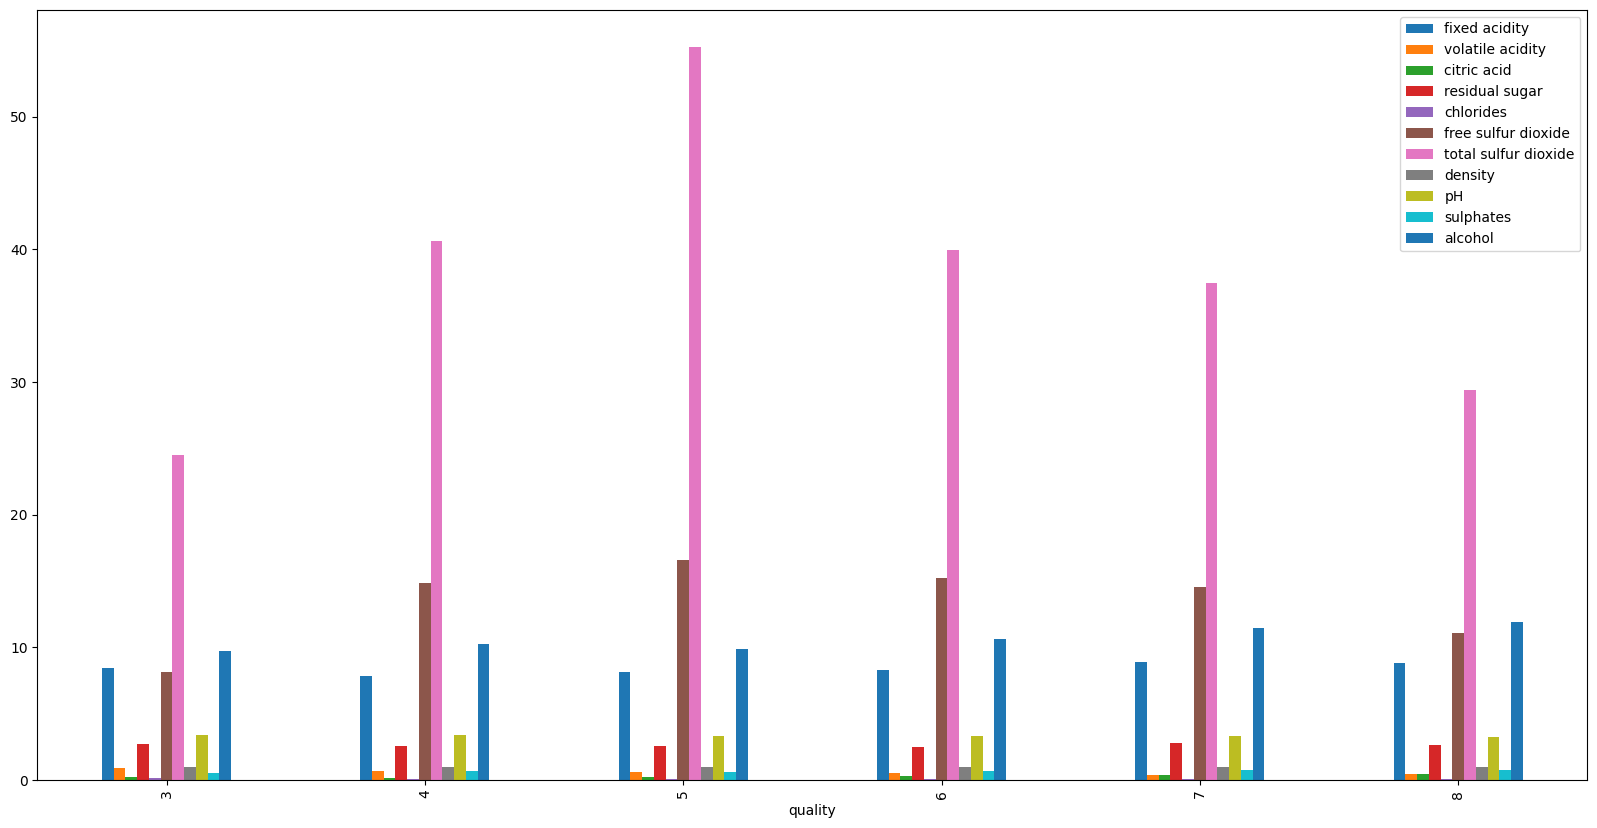

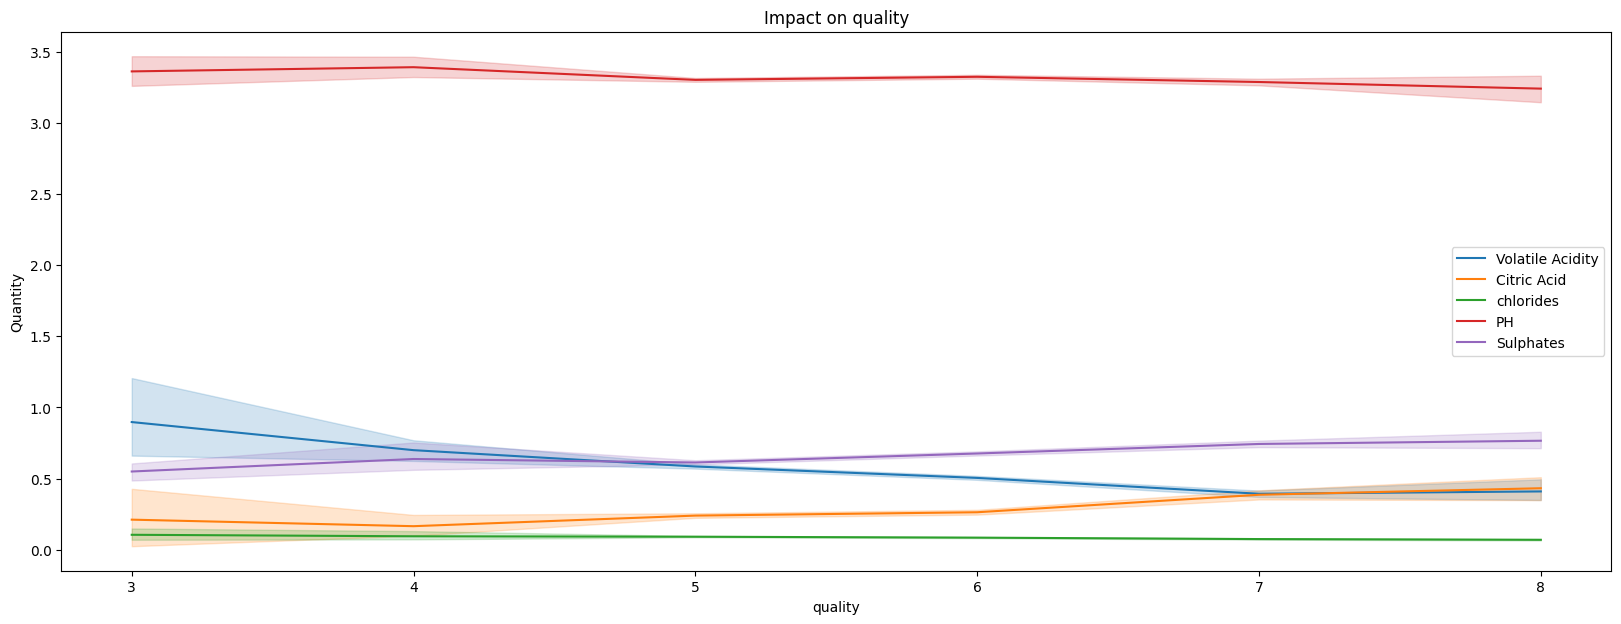

In [161]:
# graph the group by
ave_qu.plot(kind="bar",figsize=(20,10))

# feature vs. effect on quality
plt.figure(figsize=(20,7))
sb.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sb.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sb.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sb.lineplot(data=df, x="quality",y="pH",label="PH")
sb.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

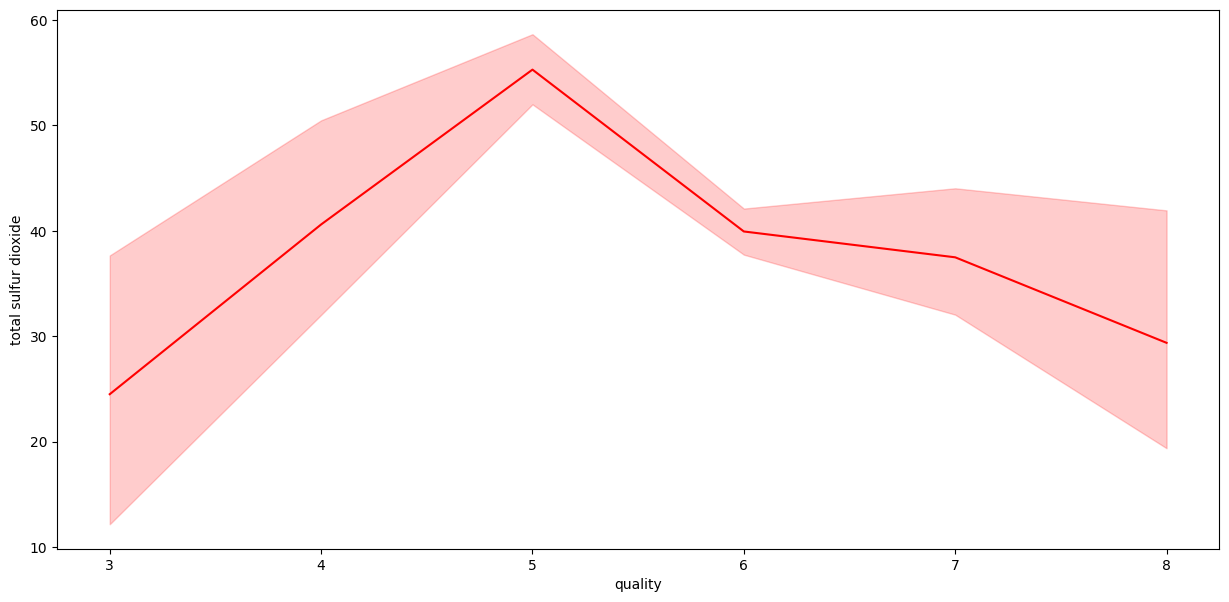

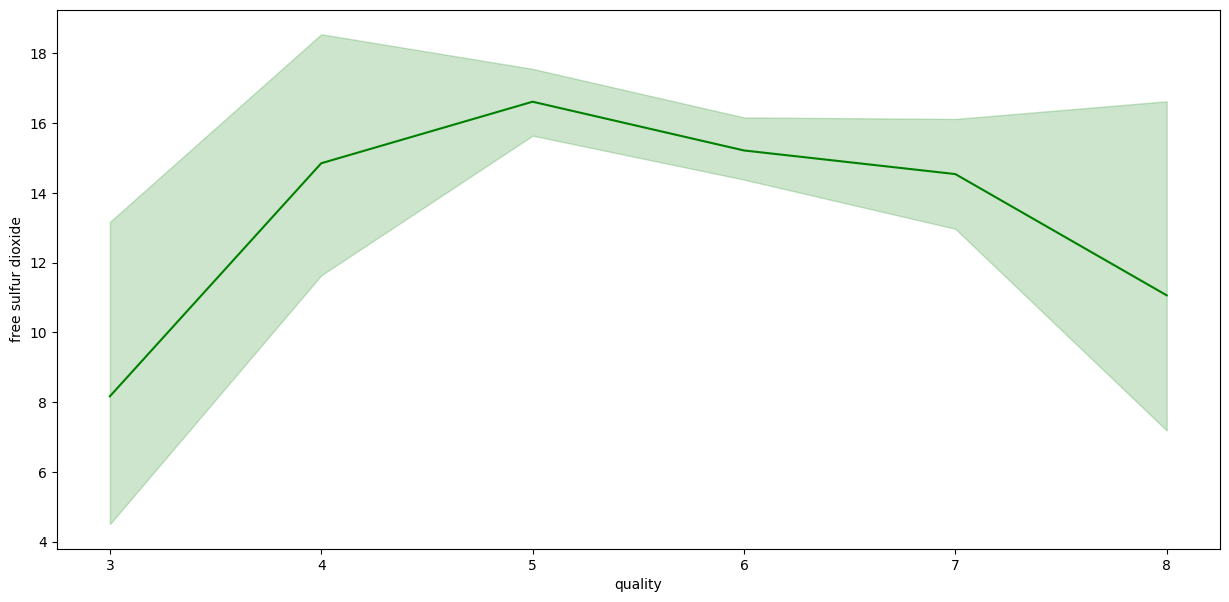

In [162]:
# effect the total sulfur dioxide in the quality
plt.figure(figsize=(15,7))
sb.lineplot(data=df, x="quality",y="total sulfur dioxide",color="r")

# effect the free sulfur dioxide in the quality
plt.figure(figsize=(15,7))
sb.lineplot(data=df, x="quality",y="free sulfur dioxide",color="g")

In [164]:
df=df.drop(['free sulfur dioxide','total sulfur dioxide'],axis=1)

<Axes: >

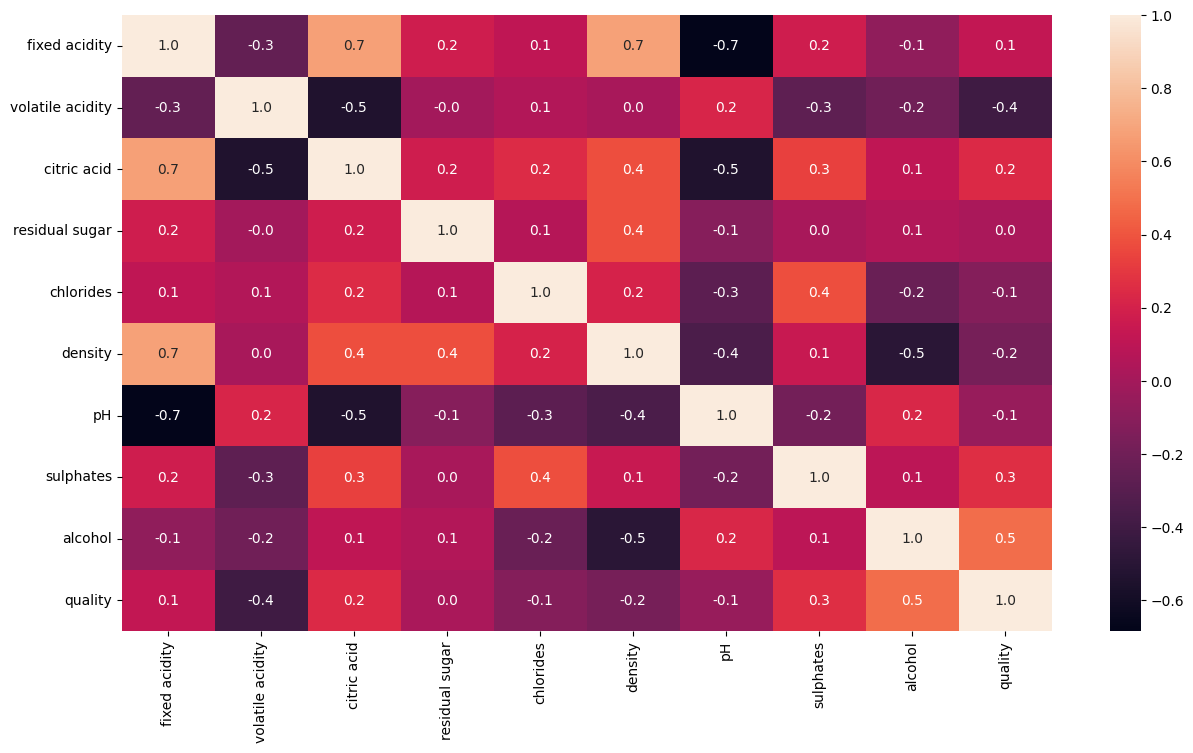

In [166]:
plt.figure(figsize = (15,8))
sb.heatmap(df.corr(),annot=True, fmt="1.1f")

Results Before feature Transformation and Regularization:

In [165]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))

# SVM with RBF Kernel
svm_model = SVC(kernel='rbf', C=1)
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

# Neural Network
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)
neural_network_accuracy = accuracy_score(y_test, (model.predict(X_test) > 0.5).astype(int))

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (RBF Kernel)', 'Neural Network'],
    'Accuracy': [logistic_accuracy, svm_accuracy, neural_network_accuracy]
})

print(results)

11/11 [==============================] - 0s 4ms/step
                 Model  Accuracy
0  Logistic Regression  0.758017
1     SVM (RBF Kernel)  0.763848
2       Neural Network  0.749271




---



# Logistic Regression

Loading the dataset.

In [167]:
df = pd.read_csv('WineQT.csv')

Pre Processing the Dataset

In [168]:
df.fillna(df.mean(), inplace = True)
X = df.drop(columns=['quality'])
y = (df['quality'] > 5).astype(int)

X_scale = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.25, train_size = 0.75, random_state = 42)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


Model

Accuracy Score of Train Model : 0.76
Accuracy Score of Test  Model : 0.76


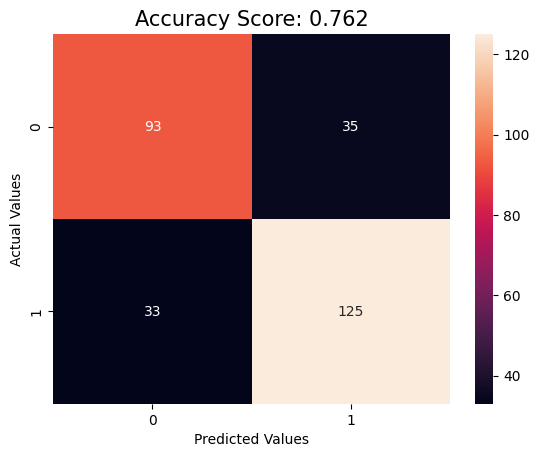

In [169]:
logreg = linear_model.LogisticRegression(random_state=40)
logreg.fit(X_train, y_train)

#accuracy
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)
print('Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

#confusion matrix
predictions = logreg.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sb.heatmap(cm1, annot=True, fmt=".0f")

#plot
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

Metrics
f1 score = 0.7861635220125787
Prediction accuracy = 0.7622377622377622
Precision score = 0.78125
Auc = 0.7588508702531646
Confusion Matrix
[[ 93  35]
 [ 33 125]]


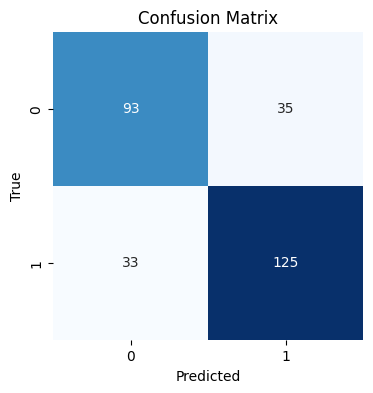

In [170]:
y_pred = logreg.predict(X_test)
f1_score = metrics.f1_score(y_test, y_pred)
prediction_accuracy = metrics.accuracy_score(y_test, y_pred)
precision_score= metrics.precision_score(y_test, y_pred)
auc_roc = metrics.roc_auc_score(y_test, y_pred)

print("Metrics")
print("f1 score =", f1_score)
print("Prediction accuracy =", prediction_accuracy)
print("Precision score =", precision_score)
print("Auc =", auc_roc)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(confusion_matrix)

# Plot the confusion matrix in color using Seaborn
plt.figure(figsize=(4, 4))
sb.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Performance

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

pred_test  = logreg.predict(X_test)
pred_train = logreg.predict(X_train)

quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

confusion_matrix_train = confusion_matrix(y_train,pred_train)
confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')

print('Confusion Matrix Test Data', '--'*20, confusion_matrix_test, sep='\n')

TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

Confusion Matrix Train Data
----------------------------------------
[[299  95]
 [112 351]]
Confusion Matrix Test Data
----------------------------------------
[[ 93  35]
 [ 33 125]]
(Total) True Negative       : 93
(Total) True Positive       : 125
(Total) Negative Positive   : 35
(Total) Negative Negative   : 33


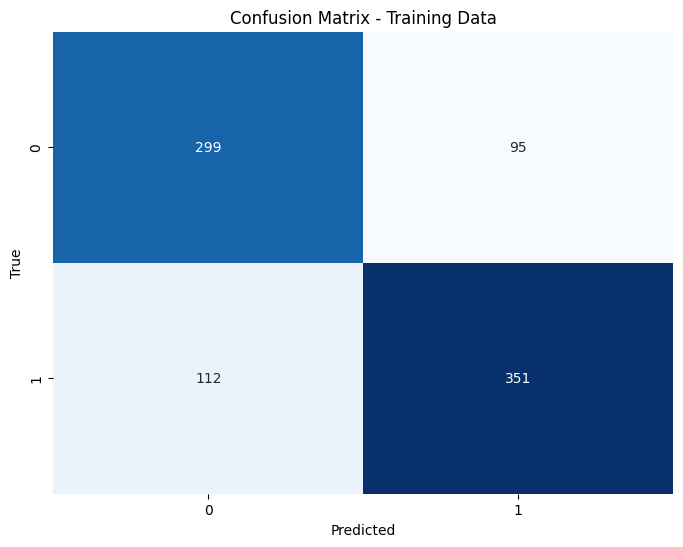

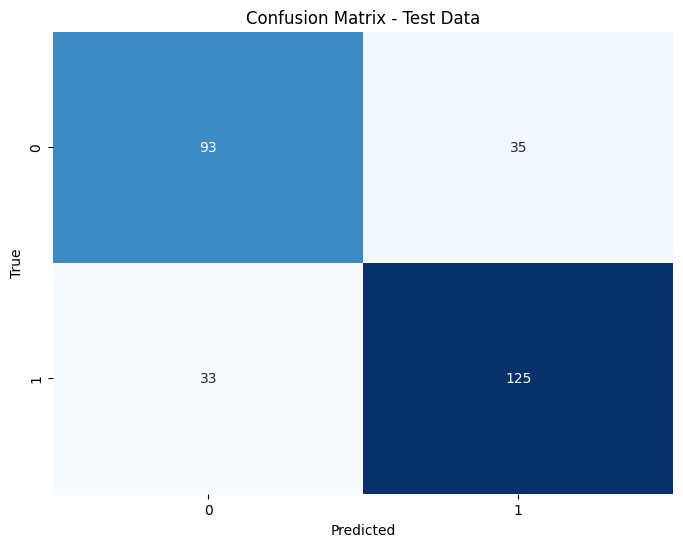

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your code for computing confusion matrices (confusion_matrix_train and confusion_matrix_test)

# Plot the confusion matrix for the training data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Data')
plt.show()

# Plot the confusion matrix for the test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Rest of your code

Feature Transformations / Initial Accuracy

In [173]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy Score of Our Model     : ",  quality_pred.score(X_test, y_test))

print("precision_score()         : ",  precision_score(y_test, pred_test, average='micro'))

print("recall_score()            : ",  recall_score(y_test, pred_test, average='micro'))

precision_s = precision_score(y_test, pred_test,average='micro')
recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))


Accuracy Score of Our Model     :  0.7622377622377622
precision_score()         :  0.7622377622377622
recall_score()            :  0.7622377622377622
F1_score     :  0.7622377622377621


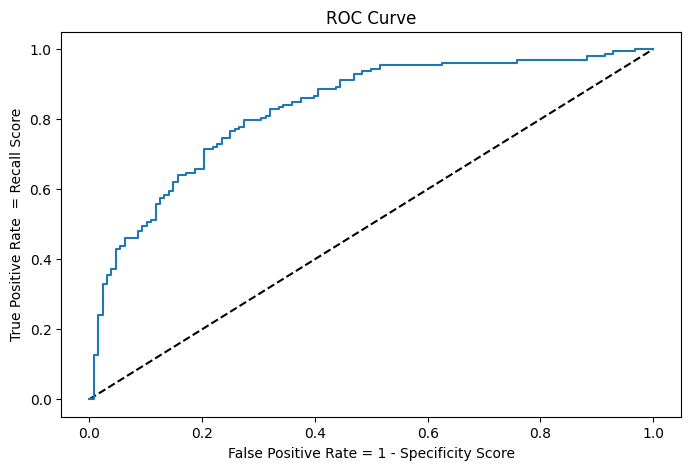

In [174]:
probs = quality_pred.predict_proba(X_test)[:,1]  #Predict probabilities for the test data

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs) #Get the ROC Curve


import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

In [175]:
# Lists to store training and validation accuracies for each model
training_accuracies = []
validation_accuracies = []

# Calculate training accuracy
training_accuracy = logreg.score(X_train, y_train)
training_accuracies.append(training_accuracy)

# Calculate validation accuracy
validation_accuracy = logreg.score(X_test, y_test)
validation_accuracies.append(validation_accuracy)

print("Accuracy with Standardization - Training:", training_accuracy)
print("Accuracy with Standardization - Validation:", validation_accuracy)

# 2. Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_minmax, y_train)

# Calculate training accuracy
training_accuracy = logreg.score(X_train_minmax, y_train)
training_accuracies.append(training_accuracy)

# Calculate validation accuracy
validation_accuracy = logreg.score(X_test_minmax, y_test)
validation_accuracies.append(validation_accuracy)

print("Accuracy with Min-Max Scaling - Training:", training_accuracy)
print("Accuracy with Min-Max Scaling - Validation:", validation_accuracy)

# 3. Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_poly, y_train)

# Calculate training accuracy
training_accuracy = logreg.score(X_train_poly, y_train)
training_accuracies.append(training_accuracy)

# Calculate validation accuracy
validation_accuracy = logreg.score(X_test_poly, y_test)
validation_accuracies.append(validation_accuracy)

print("Accuracy with Polynomial Features - Training:", training_accuracy)
print("Accuracy with Polynomial Features - Validation:", validation_accuracy)

# Print the training and validation accuracies for each model
print("Training Accuracies:", training_accuracies)
print("Validation Accuracies:", validation_accuracies)

Accuracy with Standardization - Training: 0.7584597432905484
Accuracy with Standardization - Validation: 0.7622377622377622
Accuracy with Min-Max Scaling - Training: 0.7607934655775963
Accuracy with Min-Max Scaling - Validation: 0.7622377622377622
Accuracy with Polynomial Features - Training: 0.8016336056009334
Accuracy with Polynomial Features - Validation: 0.7237762237762237
Training Accuracies: [0.7584597432905484, 0.7607934655775963, 0.8016336056009334]
Validation Accuracies: [0.7622377622377622, 0.7622377622377622, 0.7237762237762237]


Lasso (L1) Regularization

In [176]:
# Define values of k and C to iterate through
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize variables to store the best accuracy and corresponding k and C values
best_accuracy = 0
best_k = None
best_C = None

# Create a DataFrame to store accuracy results
accuracy_df = pd.DataFrame(columns=["k", "C", "Accuracy"])

# Iterate through k and C values
for k in k_values:
    for C in c_values:
        # Create an L1 logistic regression model
        logreg = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=100)

        # Select the top k features using L1 regularization
        logreg.fit(X_train, y_train)
        selected_features = X.columns[abs(logreg.coef_[0]) > 0]

        # Check if at least one feature remains after L1 regularization
        if len(selected_features) > 0:
            # Train the model on the selected features
            X_train_selected = X_train[:, X.columns.isin(selected_features)]
            X_test_selected = X_test[:, X.columns.isin(selected_features)]

            logreg.fit(X_train_selected, y_train)

            # Evaluate the model on the test set
            y_pred = logreg.predict(X_test_selected)
            accuracy = accuracy_score(y_test, y_pred)

            # Check if this model achieved a better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_k = k
                best_C = C

            # Append the results to the DataFrame
            accuracy_df = accuracy_df.append({"k": k, "C": C, "Accuracy": accuracy}, ignore_index=True)

# Print the table of accuracies
print(accuracy_df)

# Create a heatmap to visualize accuracies
# heatmap_data = accuracy_df.pivot("k", "C", "Accuracy")
# plt.figure(figsize=(10, 6))
# sb.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".4f")
# plt.title("Accuracy Heatmap for Different k and C Values")
# plt.xlabel("C Values")
# plt.ylabel("k Values")
# plt.show()

# Print the best results
print(f"Best Accuracy: {best_accuracy}")
print(f"Best k: {best_k}")
print(f"Best C: {best_C}")

<ipython-input-176-ea16090a3ac5>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({"k": k, "C": C, "Accuracy": accuracy}, ignore_index=True)
<ipython-input-176-ea16090a3ac5>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({"k": k, "C": C, "Accuracy": accuracy}, ignore_index=True)
<ipython-input-176-ea16090a3ac5>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({"k": k, "C": C, "Accuracy": accuracy}, ignore_index=True)
<ipython-input-176-ea16090a3ac5>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({"k

       k        C  Accuracy
0    2.0     0.01  0.720280
1    2.0     0.10  0.741259
2    2.0     1.00  0.751748
3    2.0    10.00  0.762238
4    2.0   100.00  0.762238
5    2.0  1000.00  0.762238
6    3.0     0.01  0.720280
7    3.0     0.10  0.741259
8    3.0     1.00  0.751748
9    3.0    10.00  0.762238
10   3.0   100.00  0.762238
11   3.0  1000.00  0.762238
12   4.0     0.01  0.720280
13   4.0     0.10  0.741259
14   4.0     1.00  0.751748
15   4.0    10.00  0.762238
16   4.0   100.00  0.762238
17   4.0  1000.00  0.762238
18   5.0     0.01  0.720280
19   5.0     0.10  0.741259
20   5.0     1.00  0.751748
21   5.0    10.00  0.762238
22   5.0   100.00  0.762238
23   5.0  1000.00  0.762238
24   6.0     0.01  0.720280
25   6.0     0.10  0.741259
26   6.0     1.00  0.751748
27   6.0    10.00  0.762238
28   6.0   100.00  0.762238
29   6.0  1000.00  0.762238
30   7.0     0.01  0.720280
31   7.0     0.10  0.741259
32   7.0     1.00  0.751748
33   7.0    10.00  0.762238
34   7.0   100.00  0

<ipython-input-176-ea16090a3ac5>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({"k": k, "C": C, "Accuracy": accuracy}, ignore_index=True)
<ipython-input-176-ea16090a3ac5>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({"k": k, "C": C, "Accuracy": accuracy}, ignore_index=True)
<ipython-input-176-ea16090a3ac5>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({"k": k, "C": C, "Accuracy": accuracy}, ignore_index=True)
<ipython-input-176-ea16090a3ac5>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({"k

L2 Regularization

In [177]:
X = df.drop(columns=['quality'])
y = (df['quality'] > 5).astype(int)
X_scale = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.25, train_size = 0.75, random_state = 42)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [179]:
# Create an L2 logistic regression model
logreg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=100)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7585
Test Accuracy: 0.7622




---



# SVM

Pre Processing

In [183]:
df = pd.read_csv('WineQT.csv')
df.fillna(df.mean(), inplace = True)

X=df.iloc[:,:-1]
y = (df['quality'] > 5).astype(int)
X_scale = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.25, train_size = 0.75, random_state = 42)

#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
#Unit variance means dividing all the values by the standard deviation.
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# y_train = y_train.values.reshape(-1, 1)
# y_test = y_test.values.reshape(-1, 1)


print('X_train.shape: ', X_train.shape)
#print('y_train.shape: ', y_train.shape)

X_train.shape:  (857, 12)


Metrics

In [182]:
from sklearn.svm import SVC

svm_model = SVC(C = 1, kernel='rbf')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 0.986013986013986
Confusion Matrix:
 [[127   1]
 [  3 155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       128
           1       0.99      0.98      0.99       158

    accuracy                           0.99       286
   macro avg       0.99      0.99      0.99       286
weighted avg       0.99      0.99      0.99       286



Linear Kernel (No Regularization)

In [ ]:
# Create a linear kernel SVM classifier
linear_svc = SVC(kernel='linear', C=1.0, random_state=None)

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the linear SVM classifier
linear_svc.fit(X_train_scaled, y_train)

# Standardize the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test data
y_pred_linear = linear_svc.predict(X_test_scaled)

# Evaluate the linear SVM classifier
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear Kernel SVM):", accuracy_linear)

# Linear Kernel SVM Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix (Linear Kernel SVM):\n", cm_linear)

# Plot the confusion matrix in color using Seaborn
plt.figure(figsize=(8, 6))
sb.heatmap(cm_linear, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix, Linear Kernel')
plt.show()

RBF Kernel (No Regularization)

Metrics
F1 score = 0.9872611464968154
Prediction accuracy = 0.986013986013986
Precision score = 0.9935897435897436
Confusion Matrix


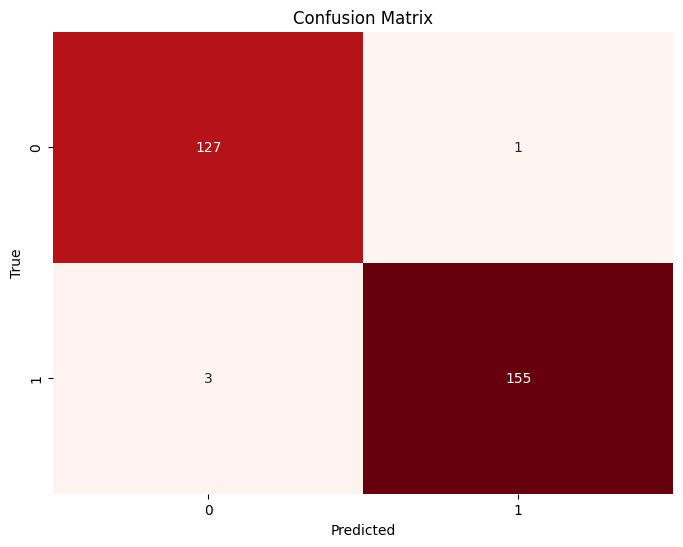

In [88]:
# SVM classification
from sklearn import svm

# Create a support vector classifier with an RBF kernel
svc = svm.SVC(kernel='rbf', C=1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Metric Scores
f1_score = metrics.f1_score(y_test, y_pred)
prediction_accuracy = metrics.accuracy_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred)
print("Metrics")
print('F1 score =', f1_score)
print('Prediction accuracy =', prediction_accuracy)
print('Precision score =', precision_score)

# Confusion Matrix
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix in color using Seaborn
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Polynomial Kernel (No regularization)

Accuracy (Polynomial Kernel SVM): 0.993006993006993
Confusion Matrix (Linear Kernel SVM):
 [[126   2]
 [  0 158]]
Confusion Matrix (Polynomial Kernel SVM):
 [[126   2]
 [  0 158]]


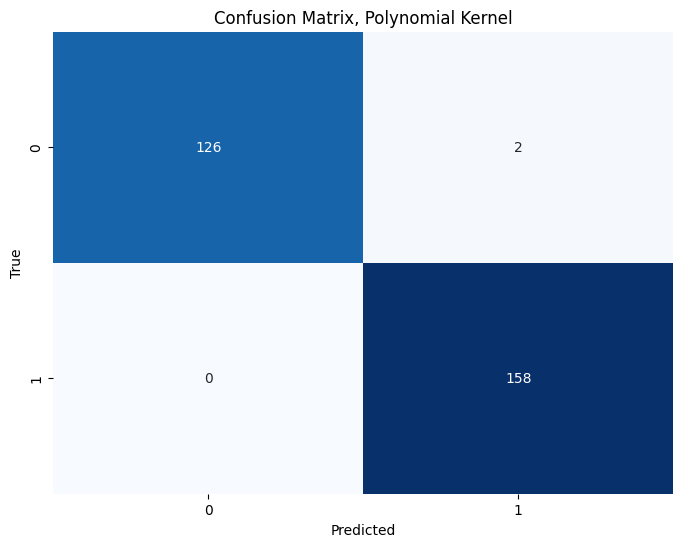

In [90]:
# Create a polynomial kernel SVM classifier
poly_svc = SVC(kernel='poly', degree=3, C=1.0, random_state=None)

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the polynomial kernel SVM classifier
poly_svc.fit(X_train_scaled, y_train)

# Standardize the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test data
y_pred_poly = poly_svc.predict(X_test_scaled)

# Evaluate the polynomial kernel SVM classifier
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy (Polynomial Kernel SVM):", accuracy_poly)

# Linear Kernel SVM Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_poly)
print("Confusion Matrix (Linear Kernel SVM):\n", cm_linear)

# Polynomial Kernel SVM Confusion Matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)
print("Confusion Matrix (Polynomial Kernel SVM):\n", cm_poly)

# Plot the confusion matrix in color using Seaborn
plt.figure(figsize=(8, 6))
sb.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix, Polynomial Kernel')
plt.show()

   Degree  Training Accuracy  Test Accuracy
0       1           1.000000       1.000000
1       2           0.700117       0.674825
2       3           0.997666       0.993007
3       4           0.763127       0.713287
4       5           0.906651       0.916084
5       6           0.728121       0.685315
6       7           0.764294       0.755245
7       8           0.703617       0.646853
8       9           0.708285       0.695804


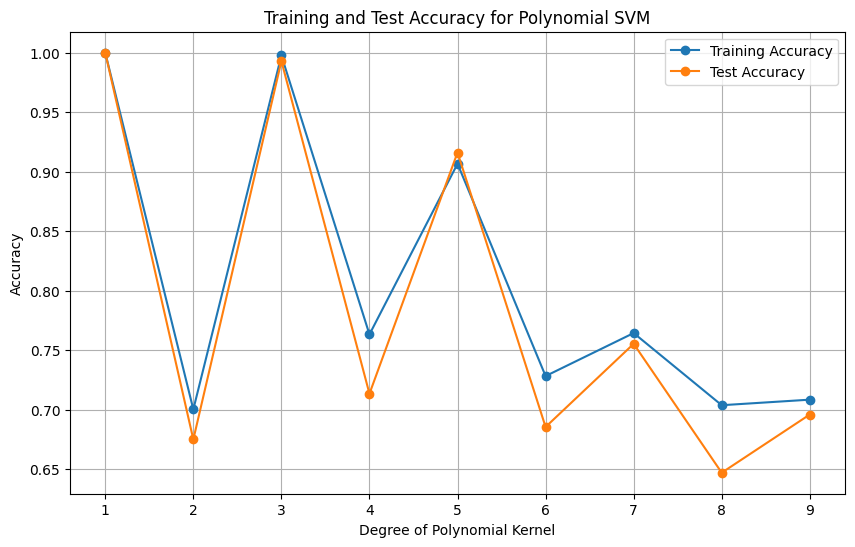

In [91]:
# Create an SVM classifier for polynomial kernels with degrees 1 to 9
degrees = list(range(1, 10))
train_accuracy = []
test_accuracy = []

for degree in degrees:
    clf = SVC(C=1.0, kernel='poly', degree=degree, gamma='auto')
    clf.fit(X_train, y_train)

    # Predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate training and test accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Create a table to display the results
results = pd.DataFrame({'Degree': degrees, 'Training Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})
print(results)

# Plot the training and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(degrees, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Training and Test Accuracy for Polynomial SVM')
plt.xlabel('Degree of Polynomial Kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

All Models with Rgularization vs. No Regularization

<ipython-input-92-8f1ffdee6ff7>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_table = accuracy_table.append({'Kernel': kernel, 'Regularization (C)': C, 'Accuracy': accuracy_l1}, ignore_index=True)
<ipython-input-92-8f1ffdee6ff7>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_table = accuracy_table.append({'Kernel': kernel, 'Regularization (C)': C, 'Accuracy': accuracy_l1}, ignore_index=True)
<ipython-input-92-8f1ffdee6ff7>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_table = accuracy_table.append({'Kernel': kernel, 'Regularization (C)': C, 'Accuracy': accuracy_l1}, ignore_index=True)
<ipython-input-92-8f1ffdee6ff7>:47: FutureWarning: The frame.append method is deprecated and will be re

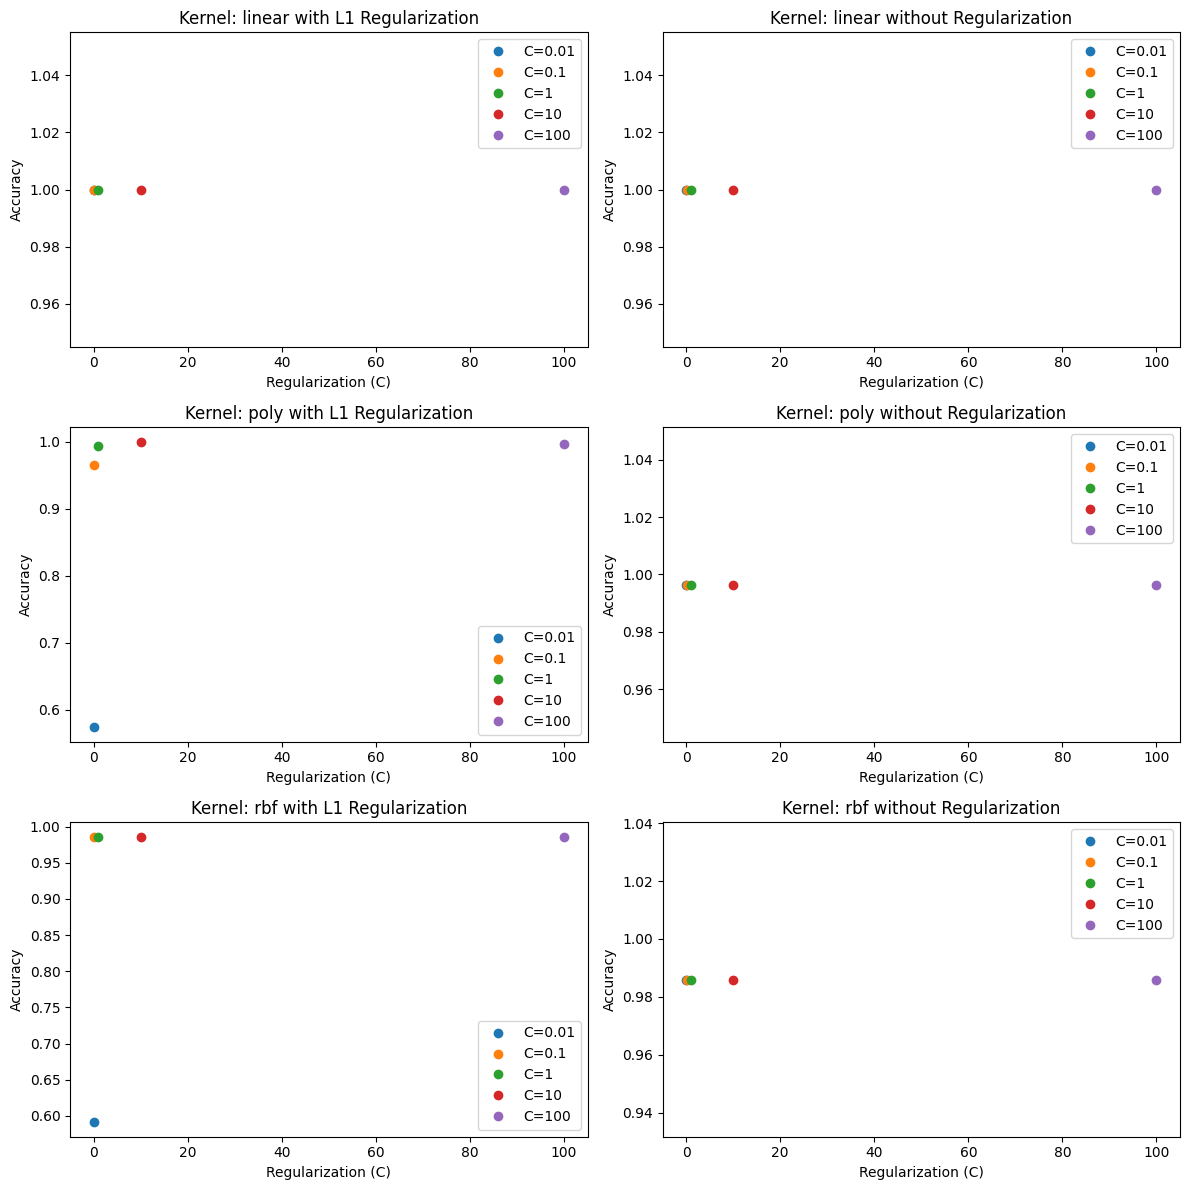


Accuracy Table:
    Kernel  Regularization (C)  Accuracy
0   linear                0.01  1.000000
1   linear                0.10  1.000000
2   linear                1.00  1.000000
3   linear               10.00  1.000000
4   linear              100.00  1.000000
5     poly                0.01  0.573427
6     poly                0.10  0.965035
7     poly                1.00  0.993007
8     poly               10.00  1.000000
9     poly              100.00  0.996503
10     rbf                0.01  0.590909
11     rbf                0.10  0.986014
12     rbf                1.00  0.986014
13     rbf               10.00  0.986014
14     rbf              100.00  0.986014


In [92]:
# Define a range of regularization parameter values (C)
C_values = [0.01, 0.1, 1, 10, 100]

# Define kernel types
kernels = ['linear', 'poly', 'rbf']

# Create subplots for different kernel types
fig, axes = plt.subplots(nrows=len(kernels), ncols=2, figsize=(12, 12))

# Create a table to store accuracy values
accuracy_table = pd.DataFrame(columns=['Kernel', 'Regularization (C)', 'Accuracy'])

for k, kernel in enumerate(kernels):
    for i, C in enumerate(C_values):
        # Create an SVM classifier with L1 regularization
        clf_l1 = SVC(C=C, kernel=kernel, degree=3, coef0=0.0, shrinking=True, probability=False, tol=0.001, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
        clf_l1.fit(X_train, y_train)

        # Create an SVM classifier without regularization (C is very high)
        clf_no_reg = SVC(C=1e6, kernel=kernel, degree=3, coef0=0.0, shrinking=True, probability=False, tol=0.001, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
        clf_no_reg.fit(X_train, y_train)

        # Predictions
        y_pred_l1 = clf_l1.predict(X_test)
        y_pred_no_reg = clf_no_reg.predict(X_test)

        # Calculate accuracy
        accuracy_l1 = accuracy_score(y_test, y_pred_l1)
        accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)

        # Plot accuracy for L1 regularization
        axes[k, 0].plot(C, accuracy_l1, 'o', label=f'C={C}')
        axes[k, 0].set_title(f'Kernel: {kernel} with L1 Regularization')
        axes[k, 0].set_xlabel('Regularization (C)')
        axes[k, 0].set_ylabel('Accuracy')
        axes[k, 0].legend()

        # Plot accuracy for no regularization
        axes[k, 1].plot(C, accuracy_no_reg, 'o', label=f'C={C}')
        axes[k, 1].set_title(f'Kernel: {kernel} without Regularization')
        axes[k, 1].set_xlabel('Regularization (C)')
        axes[k, 1].set_ylabel('Accuracy')
        axes[k, 1].legend()


        # Append accuracy values to the table
        accuracy_table = accuracy_table.append({'Kernel': kernel, 'Regularization (C)': C, 'Accuracy': accuracy_l1}, ignore_index=True)

plt.tight_layout()
plt.show()

# Display the accuracy table
print("\nAccuracy Table:")
print(accuracy_table)



---



# Neural Networks

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.regularizers import l1, l2
%matplotlib inline

Pre Processing

In [98]:
df.fillna(df.mean(), inplace = True)
X = df.drop(columns=['quality'])
y = (df['quality'] > 5).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Activation function

Sigmoid

In [99]:
def neuralNetwork_Sigmoid(X_train, Y_train, X_test, Y_test):
    input_neural = 8 #dimension to enter the neural network
    nout = np.max(Y_train)+1 # 2 output since the output can be 0 or 1
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dense(200, activation='sigmoid'))
    model.add(Dense(200, activation='sigmoid', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    model.summary()
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #modelHistory = LossHistory()
    history = model.fit(X_train, Y_train, epochs=200, batch_size=10, validation_data=(X_test,Y_test))
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return history

In [ ]:
history_sigmoid = neuralNetwork_Sigmoid(X_train, y_train, X_test, y_test)

ReLU Function

In [ ]:
def neuralNetwork_Relu(X_train, Y_train, X_test, Y_test):
    input_neural = 8 #dimension to enter the neural network
    nout = np.max(Y_train)+1 # 2 output since the output can be 0 or 1
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    model.summary()
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #modelHistory = LossHistory()
    history = model.fit(X_train, Y_train, epochs=200, batch_size=10, validation_data=(X_test,Y_test))
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return history

In [ ]:
K.clear_session()
history_Relu = neuralNetwork_Relu(X_train, y_train, X_test, y_test)

In [ ]:
print(history_Relu.history.keys())
# plot the history for accuracy of train and test data
plt.plot(history_Relu.history['accuracy'])
plt.plot(history_Relu.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot the history for loss of train and test data
plt.plot(history_Relu.history['loss'])
plt.plot(history_Relu.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Tanh Function

In [109]:
def neuralNetwork_tanh(X_train, Y_train, X_test, Y_test):
    input_neural = 8 #dimension to enter the neural network
    nout = np.max(Y_train)+1 # 2 output since the output can be 0 or 1
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='sigmoid'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu', name='hidden'))
    model.add(Dense(nout, activation='sigmoid', name='output'))
    model.summary()
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #modelHistory = LossHistory()
    history = model.fit(X_train, Y_train, epochs=200, batch_size=10, validation_data=(X_test,Y_test))
    scores = model.evaluate(X_test, Y_test)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return history

In [110]:
K.clear_session()
history_tanh = neuralNetwork_tanh(X_train, Y_train, X_test, Y_test)

NameError: ignored

In [ ]:
print(history_tanh.history.keys())
# plot the history for accuracy of train and test data
plt.plot(history_tanh.history['acc'])
plt.plot(history_tanh.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot the history for loss of train and test data
plt.plot(history_tanh.history['loss'])
plt.plot(history_tanh.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Regularized

In [107]:
# Initialize variables to store results
regularizations = ['No Regularization', 'L1 Regularization', 'L2 Regularization']
best_val_loss = []
best_val_acc = []
best_val_epoch = []

# Define a list of regularization methods
regularizers = [None, l1(0.01), l2(0.01)]

# Train neural networks with different regularization techniques
for reg, regularization in zip(regularizers, regularizations):
    # Create and train the neural network
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the specified regularization
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    # Find the epoch with the best validation loss and accuracy
    best_epoch = np.argmin(history.history['val_loss']) + 1
    best_loss = min(history.history['val_loss'])
    best_acc = max(history.history['val_accuracy'])

    # Store results
    best_val_loss.append(best_loss)
    best_val_acc.append(best_acc)
    best_val_epoch.append(best_epoch)

# Create a table of results
results_table = pd.DataFrame({
    'Regularization': regularizations,
    'Best Validation Loss': best_val_loss,
    'Best Validation Accuracy': best_val_acc,
    'Best Validation Epoch': best_val_epoch
})

# Display the table
print(results_table)


      Regularization  Best Validation Loss  Best Validation Accuracy  \
0  No Regularization              0.523606                  0.769679   
1  L1 Regularization              0.521377                  0.763848   
2  L2 Regularization              0.524724                  0.766764   

   Best Validation Epoch  
0                      6  
1                      6  
2                      5  


Impact of More Hidden Layers (3,4, and 5 layers tested)

Sigmoid

In [ ]:
print("With sigmoid activation function -")
sig_scores = []
sig_train_score = []
layers = [1, 10, 50, 100, 250, 500, 1000, 2000, 3000]  # Different number of hidden layers

for i in layers:
    clf = MLPClassifier(
        random_state=1,
        hidden_layer_sizes=i,
        activation='logistic',
        max_iter=3000
    ).fit(X_train, y_train.reshape(y_train.size,))

    score1 = clf.score(X_test, y_test)
    sig_scores.append(score1)

    score2 = clf.score(X_train, y_train)
    sig_train_score.append(score2)

    print("Number of hidden layers: " + str(i) + "; test accuracy: " + str(score1) + "; train accuracy: " + str(score2))


# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(layers, sig_scores, marker='o', label='Test Accuracy')
plt.plot(layers, sig_train_score, marker='x', label='Train Accuracy')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Sigmoid Activation (MLPClassifier)')
plt.legend()
plt.grid(True)
plt.show()

Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = ['Win', 'Lose'])
cmd.plot()
cmd.ax_.set(title = 'Confusion Matrix',
            xlabel = 'Predicted Win',
            ylabel = 'Actual Win')

In [ ]:
from sklearn.neural_network import MLPClassifier

print("With ReLU activation function -")
relu_scores = []
relu_train_score = []
layers = [1, 10, 50, 100, 250, 500, 1000, 2000, 3000]  # Different number of hidden layers

for i in layers:
    clf = MLPClassifier(
        random_state=1,
        hidden_layer_sizes=i,
        activation='relu',
        max_iter=3000
    ).fit(X_train, y_train.reshape(y_train.size,))

    score1 = clf.score(X_test, y_test)
    relu_scores.append(score1)

    score2 = clf.score(X_train, y_train)
    relu_train_score.append(score2)

    print("Number of hidden layers: " + str(i) + "; test accuracy: " + str(score1) + "; train accuracy: " + str(score2))
plt.figure(figsize=(10, 5))
plt.plot(layers, relu_scores, marker='o', label='Test Accuracy')
plt.plot(layers, relu_train_score, marker='x', label='Train Accuracy')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with ReLU Activation')
plt.legend()
plt.grid(True)
plt.show()


Three Layer Neural Network

In [111]:
# Create a three-layer neural network model
model = Sequential()

# Input layer (12 input neurons)
model.add(Dense(200, input_dim=12, activation='relu', name='input_layer'))

# Hidden layer with ReLU activation
model.add(Dense(200, activation='relu', name='hidden_layer'))

# Output layer with sigmoid activation
model.add(Dense(1, activation='sigmoid', name='output_layer'))

# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
#print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualize the model structure
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='wine_quality_nn.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 200)               2600      
                                                                 
 hidden_layer (Dense)        (None, 200)               40200     
                                                                 
 output_layer (Dense)        (None, 1)                 201       
                                                                 
Total params: 43,001
Trainable params: 43,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 - 2s - loss: 0.6078 - accuracy: 0.6812 - val_loss: 0.5560 - val_accuracy: 0.7114 - 2s/epoch - 132ms/step
Epoch 2/100
13/13 - 0s - loss: 0.5146 - accuracy: 0.7513 - val_loss: 0.5423 - val_accuracy: 0.7376 - 158ms/epoch - 12ms/step
Epoch 3/100
13/13 - 0s - loss: 0.4943 - accuracy: 0.7588 - val_loss:

Four Layer Neural Network

In [112]:
# Create a four-layer neural network model
model = Sequential()

# Input layer (12 input neurons)
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu', name='input_layer'))

# Hidden layers with ReLU activation
model.add(Dense(200, activation='relu', name='hidden_layer1'))
model.add(Dense(200, activation='relu', name='hidden_layer2'))

# Output layer with sigmoid activation
model.add(Dense(1, activation='sigmoid', name='output_layer'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/100
13/13 - 2s - loss: 0.5906 - accuracy: 0.6850 - val_loss: 0.5446 - val_accuracy: 0.7289 - 2s/epoch - 147ms/step
Epoch 2/100
13/13 - 0s - loss: 0.5142 - accuracy: 0.7538 - val_loss: 0.5318 - val_accuracy: 0.7318 - 107ms/epoch - 8ms/step
Epoch 3/100
13/13 - 0s - loss: 0.4868 - accuracy: 0.7613 - val_loss: 0.5439 - val_accuracy: 0.7172 - 132ms/epoch - 10ms/step
Epoch 4/100
13/13 - 0s - loss: 0.4652 - accuracy: 0.7912 - val_loss: 0.5281 - val_accuracy: 0.7405 - 113ms/epoch - 9ms/step
Epoch 5/100
13/13 - 0s - loss: 0.4501 - accuracy: 0.7925 - val_loss: 0.5219 - val_accuracy: 0.7434 - 115ms/epoch - 9ms/step
Epoch 6/100
13/13 - 0s - loss: 0.4469 - accuracy: 0.7912 - val_loss: 0.5345 - val_accuracy: 0.7201 - 214ms/epoch - 16ms/step
Epoch 7/100
13/13 - 0s - loss: 0.4200 - accuracy: 0.8100 - val_loss: 0.5314 - val_accuracy: 0.7259 - 308ms/epoch - 24ms/step
Epoch 8/100
13/13 - 0s - loss: 0.4062 - accuracy: 0.8075 - val_loss: 0.5536 - val_accuracy: 0.7434 - 235ms/epoch - 18ms/step
Epoch

Five Layer Neural Network

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a five-layer neural network model
model = Sequential()

# Input layer (12 input neurons)
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu', name='input_layer'))

# Hidden layers with ReLU activation
model.add(Dense(200, activation='relu', name='hidden_layer1'))
model.add(Dense(200, activation='relu', name='hidden_layer2'))
model.add(Dense(200, activation='relu', name='hidden_layer3'))

# Output layer with sigmoid activation
model.add(Dense(1, activation='sigmoid', name='output_layer'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/100
13/13 - 3s - loss: 0.6100 - accuracy: 0.6762 - val_loss: 0.5648 - val_accuracy: 0.7259 - 3s/epoch - 241ms/step
Epoch 2/100
13/13 - 0s - loss: 0.5219 - accuracy: 0.7513 - val_loss: 0.5785 - val_accuracy: 0.7230 - 231ms/epoch - 18ms/step
Epoch 3/100
13/13 - 0s - loss: 0.4772 - accuracy: 0.7837 - val_loss: 0.5358 - val_accuracy: 0.7405 - 188ms/epoch - 14ms/step
Epoch 4/100
13/13 - 0s - loss: 0.4585 - accuracy: 0.7925 - val_loss: 0.5332 - val_accuracy: 0.7259 - 254ms/epoch - 20ms/step
Epoch 5/100
13/13 - 0s - loss: 0.4383 - accuracy: 0.8025 - val_loss: 0.5578 - val_accuracy: 0.7522 - 204ms/epoch - 16ms/step
Epoch 6/100
13/13 - 0s - loss: 0.4391 - accuracy: 0.8025 - val_loss: 0.5415 - val_accuracy: 0.7376 - 255ms/epoch - 20ms/step
Epoch 7/100
13/13 - 0s - loss: 0.4048 - accuracy: 0.8175 - val_loss: 0.5611 - val_accuracy: 0.7493 - 334ms/epoch - 26ms/step
Epoch 8/100
13/13 - 0s - loss: 0.3805 - accuracy: 0.8350 - val_loss: 0.5647 - val_accuracy: 0.7376 - 327ms/epoch - 25ms/step
Ep

Comparison of Accuracies

   Hidden Layers  Train Accuracy  Test Accuracy
0              3         0.76500       0.723032
1              4         0.77125       0.737609
2              5         0.77000       0.728863


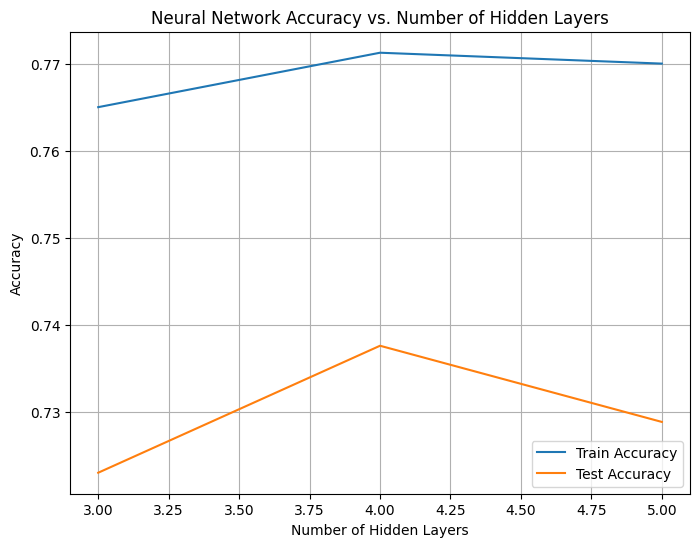

In [116]:
# Initialize variables to store results
hidden_layers = [3, 4, 5]
train_accuracies = []
test_accuracies = []

# Train neural networks with different numbers of hidden layers
for n_hidden in hidden_layers:
    # Create and train the MLPClassifier
    clf = MLPClassifier(hidden_layer_sizes=(n_hidden,), max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Create a table of results
results_table = pd.DataFrame({
    'Hidden Layers': hidden_layers,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Display the table
print(results_table)

# Create a plot to compare accuracies
plt.figure(figsize=(8, 6))
plt.plot(hidden_layers, train_accuracies, label='Train Accuracy')
plt.plot(hidden_layers, test_accuracies, label='Test Accuracy')
plt.title('Neural Network Accuracy vs. Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [118]:
# Initialize variables to store results
regularizations = ['No Regularization', 'L1 Regularization', 'L2 Regularization']
best_val_loss = []
best_val_acc = []
best_val_epoch = []

# Define a list of regularization methods
regularizers = [None, l1(0.01), l2(0.01)]

# Train neural networks with different regularization techniques
for reg, regularization in zip(regularizers, regularizations):
    # Create and train the neural network
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the specified regularization
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    # Find the epoch with the best validation loss and accuracy
    best_epoch = np.argmin(history.history['val_loss']) + 1
    best_loss = min(history.history['val_loss'])
    best_acc = max(history.history['val_accuracy'])

    # Store results
    best_val_loss.append(best_loss)
    best_val_acc.append(best_acc)
    best_val_epoch.append(best_epoch)

# Create a table of results
results_table = pd.DataFrame({
    'Regularization': regularizations,
    'Best Validation Loss': best_val_loss,
    'Best Validation Accuracy': best_val_acc,
    'Best Validation Epoch': best_val_epoch
})

# Display the table
print(results_table)

      Regularization  Best Validation Loss  Best Validation Accuracy  \
0  No Regularization              0.525365                  0.766764   
1  L1 Regularization              0.527083                  0.775510   
2  L2 Regularization              0.516863                  0.769679   

   Best Validation Epoch  
0                      4  
1                      5  
2                      5  
